![rmotr](https://user-images.githubusercontent.com/7065401/52071918-bda15380-2562-11e9-828c-7f95297e4a82.png)
<hr style="margin-bottom: 40px;">

<img src="https://user-images.githubusercontent.com/7065401/58563302-42466a80-8201-11e9-9948-b3e9f88a5662.jpg"
    style="width:400px; float: right; margin: 0 40px 40px 40px;"></img>

### Project

# Bike store sales

Let's put in practice the topics covered in the course and analyze sales made in a Bike Shop.

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Hands on! 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
sales = pd.read_csv('data/sales_data.csv')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### First look at our data

Analyze what columns we have, what type they are and what data is on them.

In [7]:
sales.shape

(5000, 16)

In [8]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              5000 non-null   object
 1   Day               5000 non-null   int64 
 2   Month             5000 non-null   object
 3   Year              5000 non-null   int64 
 4   Customer_Age      5000 non-null   int64 
 5   Customer_Gender   5000 non-null   object
 6   Country           5000 non-null   object
 7   State             5000 non-null   object
 8   Product_Category  5000 non-null   object
 9   Sub_Category      5000 non-null   object
 10  Product           5000 non-null   object
 11  Order_Quantity    5000 non-null   int64 
 12  Unit_Cost         5000 non-null   int64 
 13  Unit_Price        5000 non-null   int64 
 14  Profit            5000 non-null   int64 
 15  Revenue           5000 non-null   int64 
dtypes: int64(8), object(8)
memory usage: 625.1+ KB


In [11]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Revenue
0,2014-03-05,5,March,2014,34,M,United States,California,Accessories,Fenders,Fender Set - Mountain,27,8,22,366,582
1,2013-08-18,18,August,2013,31,F,Canada,British Columbia,Clothing,Vests,"Classic Vest, L",13,24,64,512,824
2,2014-02-04,4,February,2014,31,F,United States,Washington,Bikes,Touring Bikes,"Touring-1000 Yellow, 54",1,1482,2384,378,1860
3,2013-09-09,9,September,2013,33,M,Australia,Victoria,Accessories,Tires and Tubes,LL Road Tire,25,8,21,215,415
4,2016-05-16,16,May,2016,35,F,United States,Washington,Accessories,Tires and Tubes,Mountain Tire Tube,28,2,5,53,109


In [10]:
sales.tail()

,Date,Day,Month,Year,Customer_Age,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Revenue
4995,2014-01-27,27,January,2014,34,M,United States,California,Accessories,Bottles and Cages,Water Bottle - 30 oz.,20,2,5,58,98
4996,2014-07-14,14,July,2014,17,M,France,Val d'Oise,Clothing,Caps,AWC Logo Cap,12,7,9,1,85
4997,2013-12-30,30,December,2013,25,F,Canada,British Columbia,Accessories,Helmets,"Sport-100 Helmet, Blue",20,13,35,433,693
4998,2016-01-06,6,January,2016,57,M,Canada,British Columbia,Accessories,Tires and Tubes,Patch Kit/8 Patches,16,1,2,16,32
4999,2014-03-09,9,March,2014,50,F,Australia,Queensland,Accessories,Tires and Tubes,Patch Kit/8 Patches,15,1,2,10,25


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Fixing column types

- Cast `Date` to `datetime`.
- Cast `Customer_Gender`, `Country`, `State`, `Product_Category` and `Sub_Category` to `category`.

In [9]:
sales['Date'] = pd.to_datetime(sales['Date'])

In [12]:
for col in ['Customer_Gender', 'Country', 'State', 'Product_Category', 'Sub_Category']:
  sales[col] = sales[col].astype('category')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Get a summary of the main statistics of the whole data

In [13]:
sales.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Revenue
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,15.668800,2014.405000,35.933800,11.820400,278.415000,470.680600,291.653400,772.758000
std,8.797783,1.266055,11.087886,9.607841,562.721951,941.590529,457.359971,1306.052588
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-24.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,64.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,25.000000,103.000000,226.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,367.000000,829.250000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,5342.000000,14026.000000


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### What's the mean of `Customers_Age`?

In [14]:
sales['Customer_Age'].mean()

35.9338

Go ahead and show a <b>density (KDE)</b> and a <b>box plot</b> with the `Customer_Age` data:

<AxesSubplot:ylabel='Density'>

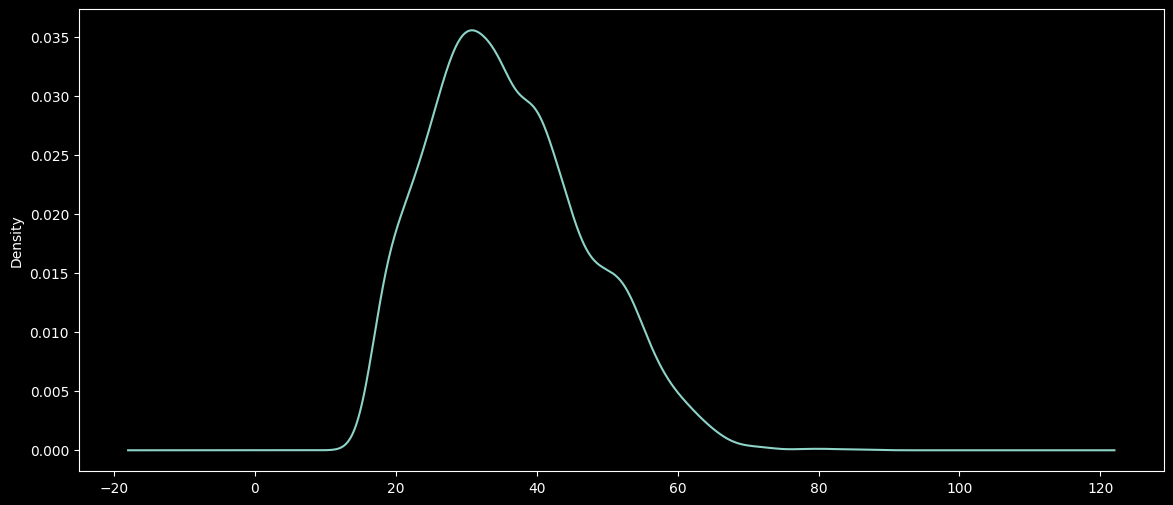

In [15]:
sales['Customer_Age'].plot(kind='kde', figsize=(14,6))

<AxesSubplot:>

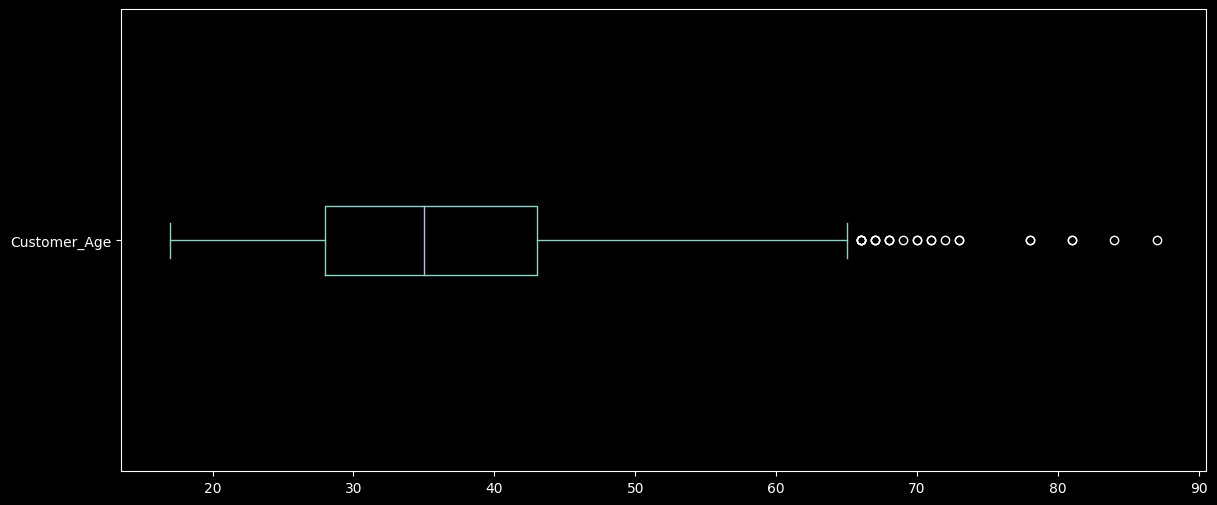

In [20]:
sales['Customer_Age'].plot(kind='box', vert=False, figsize=(14,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### What's the mean of `Order_Quantity`?

In [21]:
sales['Order_Quantity'].mean()

11.8204

Go ahead and show a <b>histogram</b> and a <b>box plot</b> with the `Order_Quantity` data:

<AxesSubplot:ylabel='Frequency'>

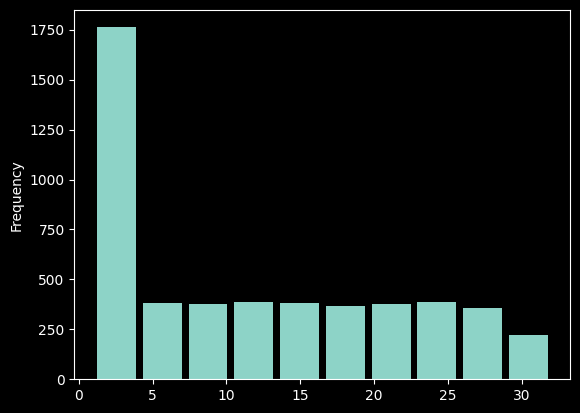

In [22]:
sales['Order_Quantity'].plot(kind='hist', rwidth=0.85)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### In which countries were sales made?

In [29]:
sales['Country'].unique()

['United States', 'Canada', 'Australia', 'United Kingdom', 'Germany', 'France']
Categories (6, object): ['Australia', 'Canada', 'France', 'Germany', 'United Kingdom', 'United States']

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Sort sales by year

Older sales should be at the bottom.

In [30]:
sales.sort_values(['Year'], ascending=False, inplace=True)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Reset the current index

Don't keep the old index.

In [31]:
sales.reset_index(drop=True, inplace=True)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many sales per year do we have?

In [32]:
sales['Year'].value_counts()

2014    1327
2016    1272
2015    1123
2013    1040
2011     126
2012     112
Name: Year, dtype: int64

Go ahead and show a <b>pie plot</b> and a <b>bar plot</b> with the previous data:

<AxesSubplot:ylabel='Year'>

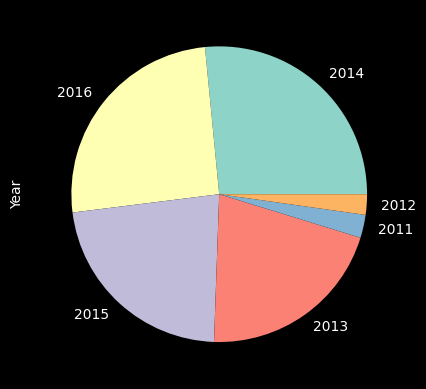

In [42]:
sales['Year'].value_counts().plot(kind='pie')

<AxesSubplot:>

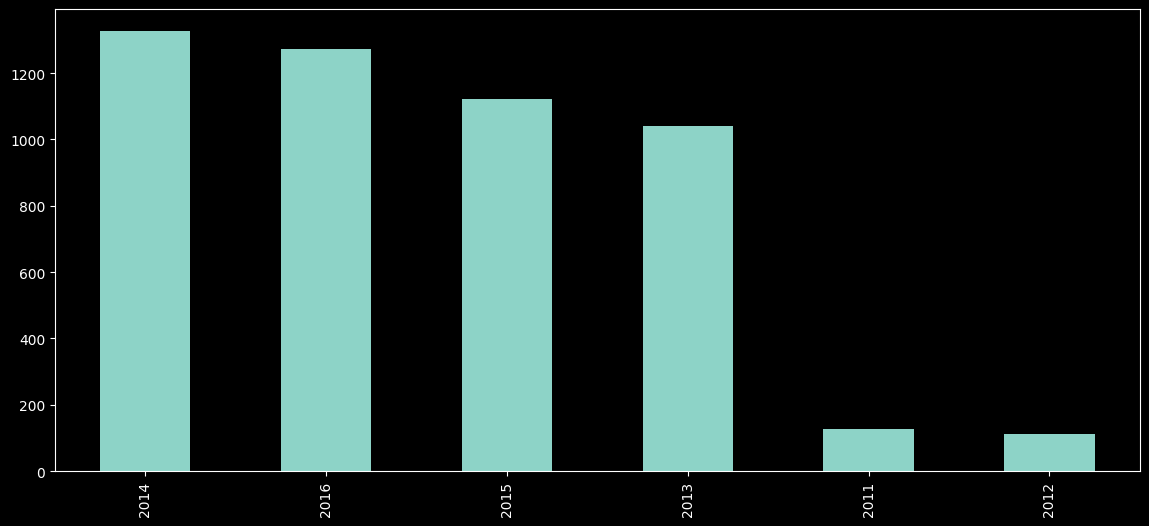

In [37]:
sales['Year'].value_counts().plot(kind='bar', figsize=(14,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Create a new `Cost` column

This column should be:
$$ Cost = Unit\_Cost * Order\_Quantity $$

In [43]:
sales['Cost'] = sales['Unit_Cost'] * sales['Order_Quantity']

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Create a new `YearMonth` column

This new `YearMonth` column should be the concatenation of `Year` and `Month` columns, separated by a '-'.

In [44]:
sales['YearMonth'] = sales['Year'].astype('str') + '-' + sales['Month']

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How did sales evolve through the years?

Count how many sales we have per `YearMonth`.

In [45]:
sales['YearMonth'].value_counts()

2015-December    232
2016-April       218
2014-June        215
2013-December    215
2016-May         214
                ... 
2012-December      7
2012-February      6
2011-February      6
2011-June          6
2012-March         4
Name: YearMonth, Length: 62, dtype: int64

Go ahead and show a <b>bar plot</b> with the previous data:

<AxesSubplot:>

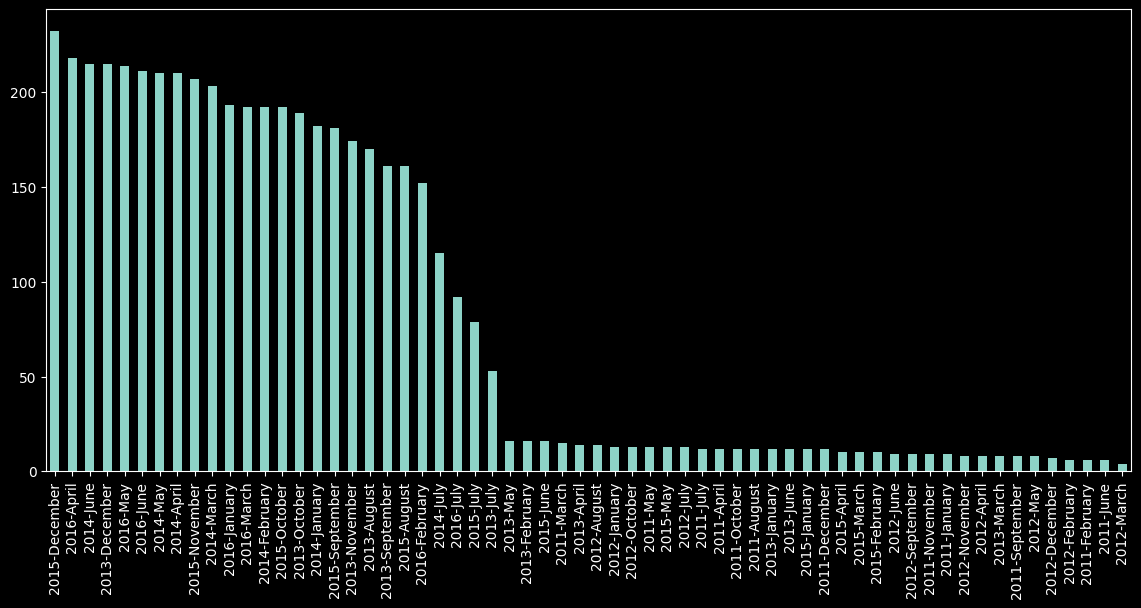

In [47]:
sales['YearMonth'].value_counts().plot(kind='bar', figsize=(14,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Which country has the most sales `quantity of sales`?

In [48]:
sales['Country'].value_counts().head(1)

United States    1700
Name: Country, dtype: int64

Go ahead and show a <b>bar plot</b> of the sales per country:

<AxesSubplot:>

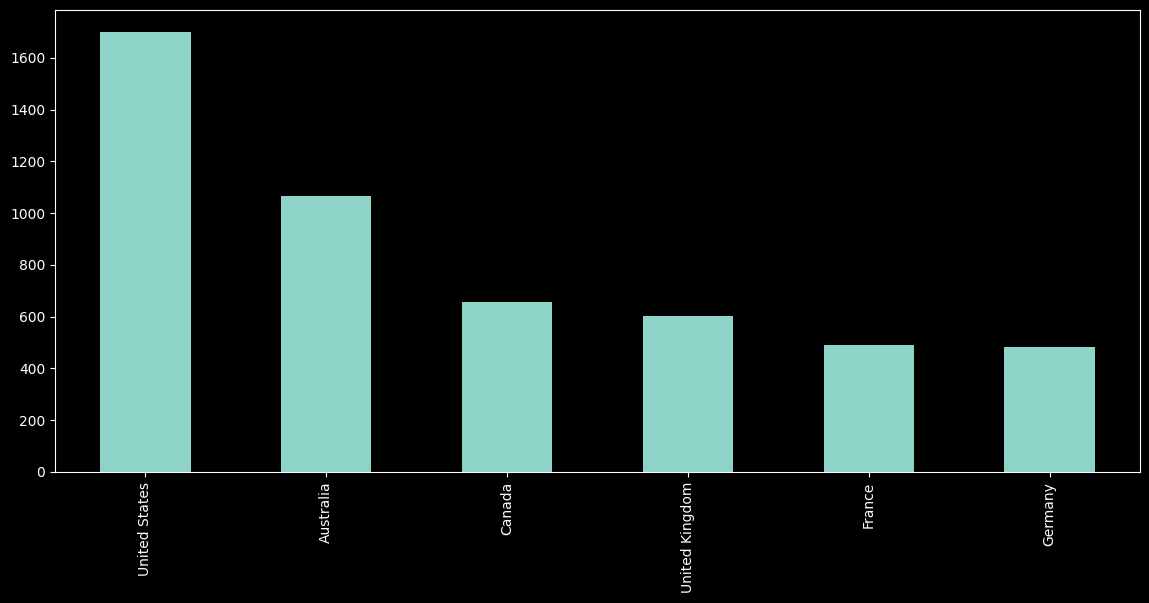

In [51]:
sales['Country'].value_counts().plot(kind='bar', figsize=(14,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Get a list of every product sold

In [53]:
sales.loc[:, 'Product'].unique()

array(['Sport-100 Helmet, Red', 'Water Bottle - 30 oz.',
       'Sport-100 Helmet, Blue', 'Sport-100 Helmet, Black',
       'Patch Kit/8 Patches', 'Hitch Rack - 4-Bike', 'Road Tire Tube',
       'ML Mountain Tire', 'Mountain-400-W Silver, 42',
       'Touring Tire Tube', 'Fender Set - Mountain',
       'Touring-3000 Blue, 62', 'AWC Logo Cap',
       'Long-Sleeve Logo Jersey, L', 'Bike Wash - Dissolver',
       'Mountain-200 Silver, 46', 'Road-150 Red, 52', 'LL Mountain Tire',
       'Road-150 Red, 44', 'Road Bottle Cage', 'LL Road Tire',
       'Touring-1000 Yellow, 60', 'HL Road Tire', 'Mountain Tire Tube',
       'Touring-3000 Blue, 44', 'Short-Sleeve Classic Jersey, L',
       'Touring-1000 Blue, 50', 'HL Mountain Tire',
       'Half-Finger Gloves, L', 'Half-Finger Gloves, M',
       'Racing Socks, M', 'Road-650 Red, 52', 'ML Road Tire',
       'Mountain-400-W Silver, 40', 'Mountain-200 Silver, 42',
       'Long-Sleeve Logo Jersey, XL', 'Touring-1000 Yellow, 54',
       'Hydration P

Create a **bar plot** showing the 10 most sold products (best sellers):

<AxesSubplot:>

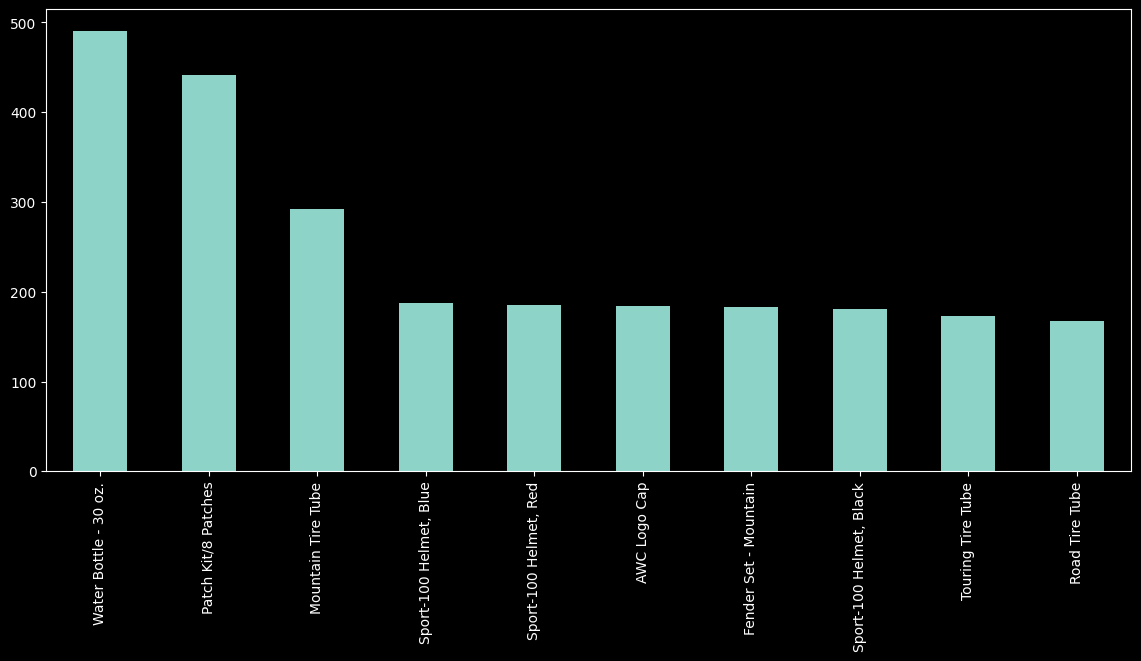

In [55]:
sales['Product'].value_counts().head(10).plot(kind='bar', figsize=(14,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Can you see any relationship between `Unit_Cost` and `Unit_Price`?

Show a <b>scatter plot</b> between both columns.

<AxesSubplot:xlabel='Unit_Cost', ylabel='Unit_Price'>

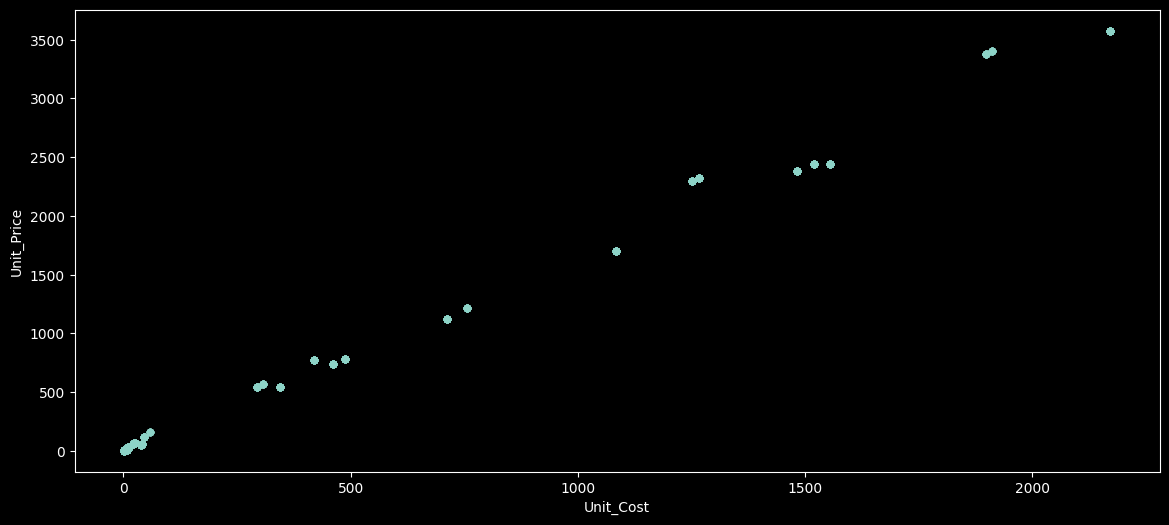

In [60]:
sales.plot(kind='scatter', x='Unit_Cost', y='Unit_Price', figsize=(14,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Can you see any relationship between `Order_Quantity` and `Profit`?

Show a <b>scatter plot</b> between both columns.

<AxesSubplot:xlabel='Order_Quantity', ylabel='Profit'>

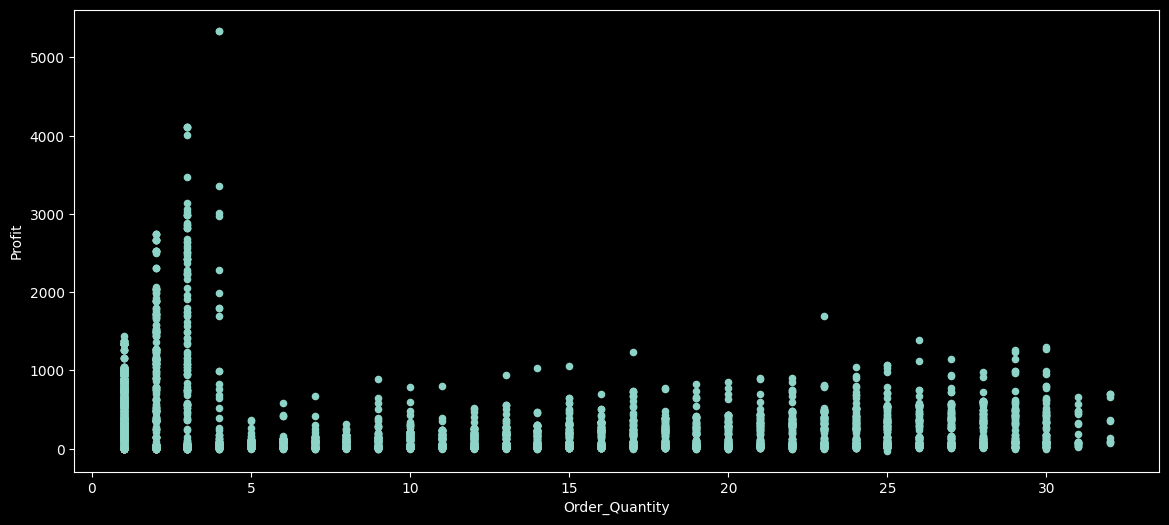

In [61]:
sales.plot(kind='scatter', x='Order_Quantity', y='Profit', figsize=(14,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Can you see any relationship between `Profit` per `Country`?

Show a grouped <b>box plot</b> per country with the profit values.

Profit    AxesSubplot(0.125,0.11;0.775x0.77)
dtype: object

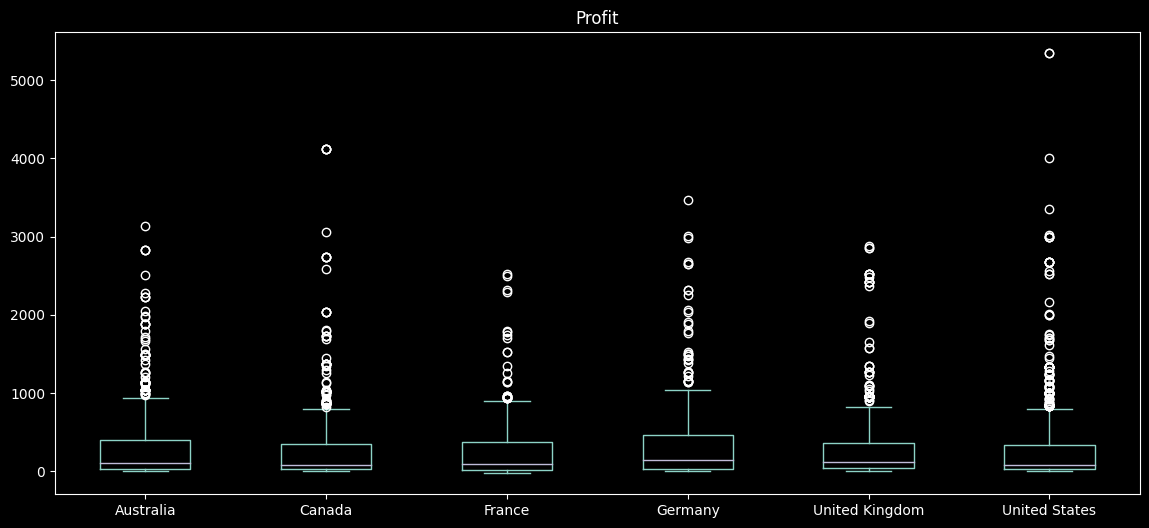

In [69]:
sales[['Profit', 'Country']].plot(kind='box', vert=True, by='Country', figsize=(14,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Can you see any relationship between the `Customer_Age` per `Country`?

Show a grouped <b>box plot</b> per country with the customer age values.

Customer_Age    AxesSubplot(0.125,0.11;0.775x0.77)
dtype: object

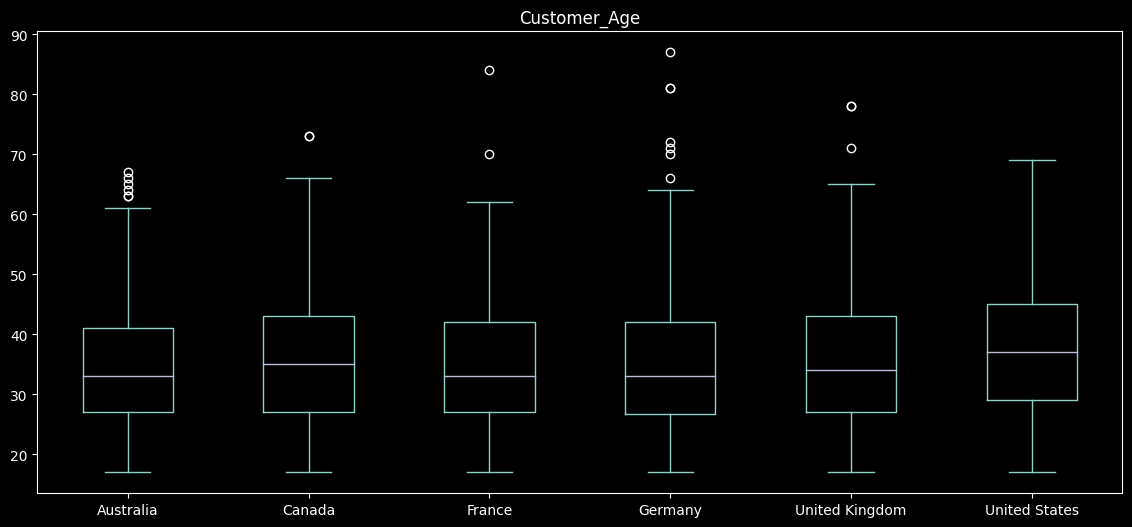

In [70]:
sales[['Customer_Age', 'Country']].plot(kind='box', by='Country', figsize=(14,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Increase 50 U$S revenue to every sale

In [71]:
sales['Revenue'] += 50

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many orders were made in `Canada` or `France`?

In [72]:
sales.loc[(sales['Country'] == 'Canada') | (sales['Country'] == 'France')]

,Date,Day,Month,Year,Customer_Age,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Revenue,Cost,YearMonth
4,2016-06-03,3,June,2016,44,F,Canada,British Columbia,Accessories,Helmets,"Sport-100 Helmet, Black",18,13,35,390,674,234,2016-June
11,2016-07-22,22,July,2016,17,F,Canada,British Columbia,Accessories,Tires and Tubes,ML Mountain Tire,21,11,30,393,674,231,2016-July
16,2016-02-21,21,February,2016,31,F,France,Essonne,Accessories,Helmets,"Sport-100 Helmet, Blue",16,13,35,330,588,208,2016-February
31,2016-03-09,9,March,2016,22,F,France,Seine Saint Denis,Accessories,Tires and Tubes,Patch Kit/8 Patches,13,1,2,8,71,13,2016-March
62,2016-05-21,21,May,2016,37,M,Canada,British Columbia,Bikes,Touring Bikes,"Touring-1000 Blue, 50",1,1482,2384,878,2410,1482,2016-May
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4966,2011-02-22,22,February,2011,30,M,Canada,British Columbia,Bikes,Road Bikes,"Road-750 Black, 52",4,344,540,762,2188,1376,2011-February
4970,2011-07-04,4,July,2011,43,F,France,Seine Saint Denis,Bikes,Road Bikes,"Road-250 Red, 48",1,1519,2443,484,2053,1519,2011-July
4977,2011-11-29,29,November,2011,17,M,France,Nord,Bikes,Mountain Bikes,"Mountain-200 Silver, 46",1,1266,2320,752,2068,1266,2011-November
4981,2011-04-14,14,April,2011,53,F,France,Hauts de Seine,Bikes,Road Bikes,"Road-250 Black, 44",1,1555,2443,717,2322,1555,2011-April


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many `Bike Racks` orders were made from Canada?

In [73]:
sales.loc[(sales['Country'] == 'Canada') & (sales['Sub_Category'] == 'Bike Racks')]

,Date,Day,Month,Year,Customer_Age,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Revenue,Cost,YearMonth
2159,2015-11-11,11,November,2015,34,M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1697,2782,1035,2015-November
2299,2015-11-17,17,November,2015,29,F,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,14,45,120,1033,1713,630,2015-November
3662,2014-03-10,10,March,2014,43,F,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,5,45,120,369,644,225,2014-March


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many orders were made in each region (state) of France?

In [75]:
regions_of_france = sales.loc[sales['Country'] == 'France', 'State'].value_counts()

Go ahead and show a <b>bar plot</b> with the results:

<AxesSubplot:>

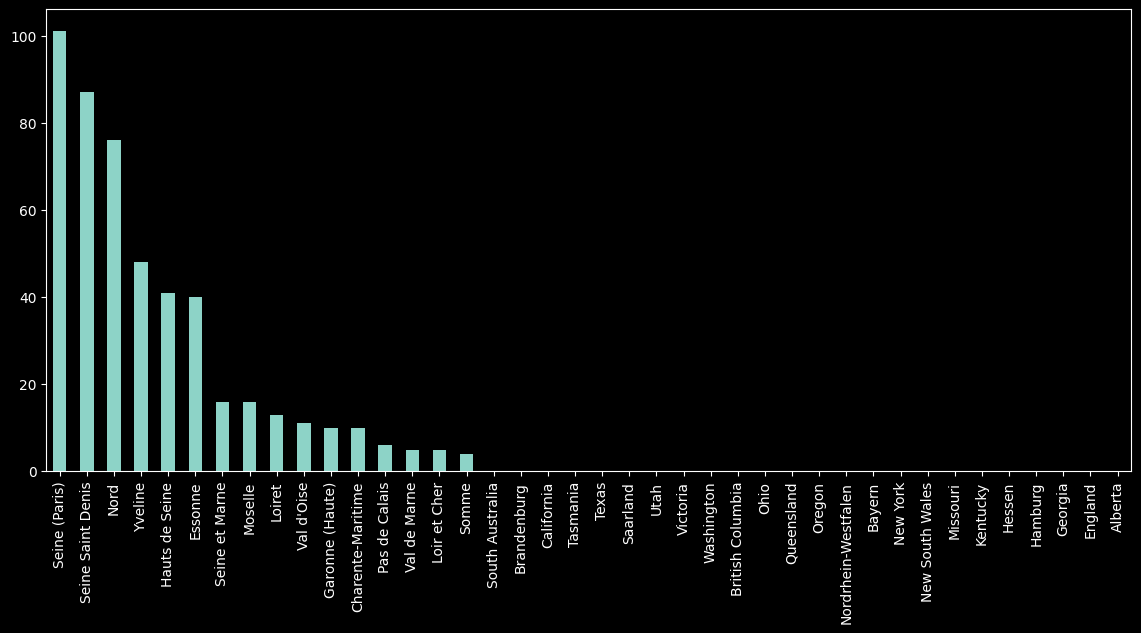

In [76]:
regions_of_france.plot(kind='bar', figsize=(14,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many sales were made per category?

In [77]:
sales['Product_Category'].value_counts()

Accessories    3090
Bikes          1166
Clothing        744
Name: Product_Category, dtype: int64

Go ahead and show a <b>pie plot</b> with the results:

<AxesSubplot:ylabel='Product_Category'>

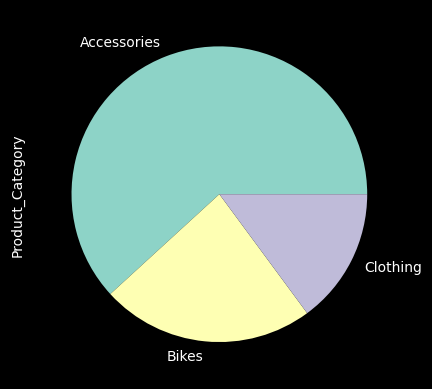

In [78]:
sales['Product_Category'].value_counts().plot(kind='pie')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many orders were made per accessory sub-categories?

In [84]:
accessories = sales.loc[sales['Product_Category'] == 'Accessories', 'Sub_Category'].value_counts()
accessories

Tires and Tubes      1458
Bottles and Cages     719
Helmets               553
Fenders               183
Cleaners               78
Hydration Packs        64
Bike Racks             26
Bike Stands             9
Gloves                  0
Jerseys                 0
Mountain Bikes          0
Road Bikes              0
Shorts                  0
Socks                   0
Caps                    0
Touring Bikes           0
Vests                   0
Name: Sub_Category, dtype: int64

Go ahead and show a <b>bar plot</b> with the results:

<AxesSubplot:>

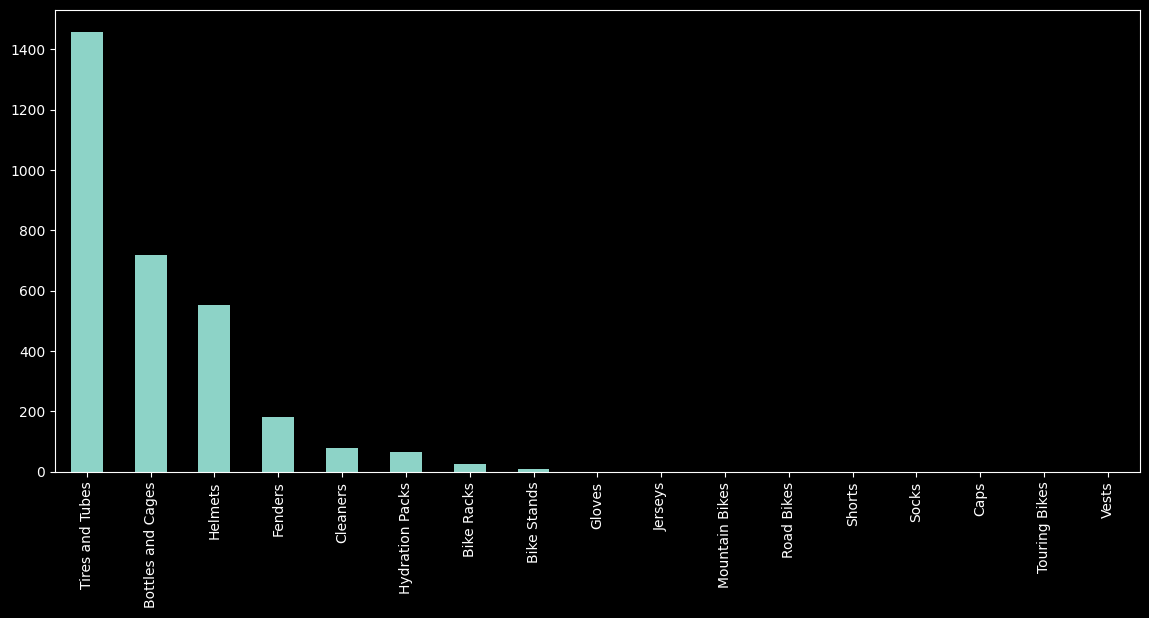

In [85]:
accessories.plot(kind='bar', figsize=(14,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many orders were made per bike sub-categories?

In [89]:
bikes = sales.loc[sales['Product_Category'] == 'Bikes', 'Sub_Category'].value_counts()
bikes

Road Bikes           600
Mountain Bikes       391
Touring Bikes        175
Bike Racks             0
Jerseys                0
Tires and Tubes        0
Socks                  0
Shorts                 0
Hydration Packs        0
Bike Stands            0
Helmets                0
Gloves                 0
Fenders                0
Cleaners               0
Caps                   0
Bottles and Cages      0
Vests                  0
Name: Sub_Category, dtype: int64

Go ahead and show a <b>pie plot</b> with the results:

<AxesSubplot:ylabel='Sub_Category'>

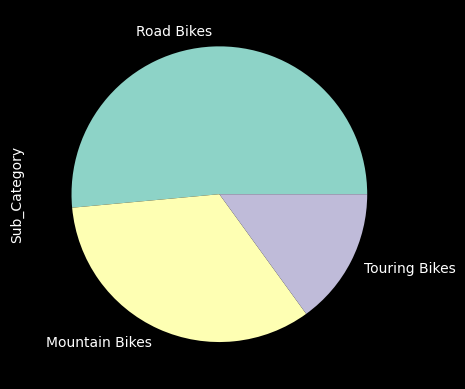

In [90]:
bikes.plot(kind='pie')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Which gender has the most amount of sales?

In [91]:
sales['Customer_Gender'].value_counts()

M    2564
F    2436
Name: Customer_Gender, dtype: int64

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many sales with more than 500 in `Revenue` were made by men?

In [94]:
sales.loc[(sales['Customer_Gender'] == 'M') & (sales['Revenue'] == 500)]

,Date,Day,Month,Year,Customer_Age,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Revenue,Cost,YearMonth
985,2016-03-20,20,March,2016,51,M,Canada,British Columbia,Accessories,Helmets,"Sport-100 Helmet, Black",13,13,35,281,500,169,2016-March


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Get the top-5 sales with the highest revenue

In [95]:
sales.sort_values(['Revenue'], ascending=False).head(5)

,Date,Day,Month,Year,Customer_Age,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Revenue,Cost,YearMonth
4905,2011-01-17,17,January,2011,44,F,United States,California,Bikes,Road Bikes,"Road-150 Red, 62",4,2171,3578,5342,14076,8684,2011-January
4986,2011-03-27,27,March,2011,24,M,United States,California,Bikes,Road Bikes,"Road-150 Red, 44",4,2171,3578,5342,14076,8684,2011-March
4959,2011-12-29,29,December,2011,25,M,Canada,British Columbia,Bikes,Road Bikes,"Road-150 Red, 62",3,2171,3578,4114,10677,6513,2011-December
1689,2015-12-11,11,December,2015,44,M,Canada,British Columbia,Bikes,Road Bikes,"Road-150 Red, 62",3,2171,3578,4114,10677,6513,2015-December
678,2016-01-28,28,January,2016,34,M,Canada,British Columbia,Bikes,Road Bikes,"Road-150 Red, 62",3,2171,3578,4114,10677,6513,2016-January


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Get the sale with the highest revenue

In [105]:
sales.sort_values(['Revenue'], ascending=False).head(1)

,Date,Day,Month,Year,Customer_Age,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Revenue,Cost,YearMonth
4905,2011-01-17,17,January,2011,44,F,United States,California,Bikes,Road Bikes,"Road-150 Red, 62",4,2171,3578,5342,14076,8684,2011-January


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### What is the mean `Order_Quantity` of orders with more than 10K in revenue?

In [109]:
more_10k = sales['Revenue'] > 10_000
sales.loc[more_10k, 'Order_Quantity'].mean()

3.25

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### What is the mean `Order_Quantity` of orders with less than 10K in revenue?

In [110]:
less_10k = sales['Revenue'] < 10_000
sales.loc[less_10k, 'Order_Quantity'].mean()

11.834134615384615

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many orders were made in May of 2016?

In [112]:
may_16 = (sales['Year'] == 2016) & (sales['Month'] == 'May')
sales.loc[may_16].shape[0]

214

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many orders were made between May and July of 2016?

In [113]:
may_july16 = (sales['Year'] == 2016) & (sales["Month"].isin(['May', 'June', 'July']))
sales.loc[may_july16].shape[0]

517

Show a grouped <b>box plot</b> per month with the profit values.

Profit    AxesSubplot(0.125,0.11;0.775x0.77)
dtype: object

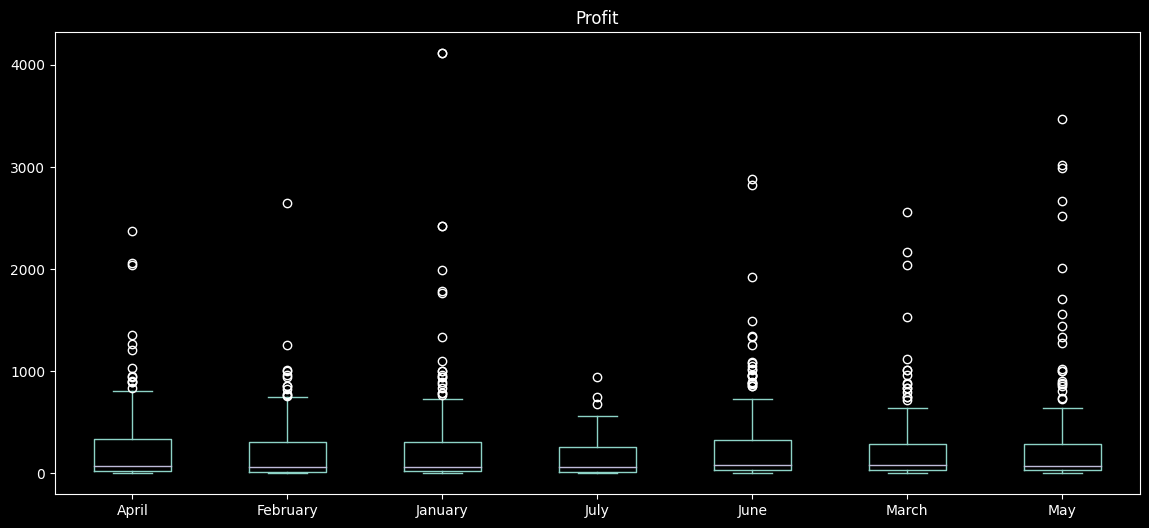

In [114]:
profit_2016 = sales.loc[sales['Year'] == 2016, ['Profit', 'Month']]
profit_2016.plot(kind='box', by='Month', figsize=(14,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Add 7.2% TAX on every sale `Unit_Price` within United States

In [121]:
sales.loc[sales['Country'] == 'United States', 'Unit_Price'] *= 1.072

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)